In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd
# Use .. to go up one level from control-runs/ to the project root
train_data = pd.read_csv('../content/sample_data/mnist_train_small.csv')
# Replicate the dataset 100 times. Adjust this number based on your training time.
train_data = pd.concat([train_data] * 10, ignore_index=True)

print(len(train_data))
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

199990
Shape of train_data: (199990, 785)
Shape of X after separating features: (199990, 784)


In [3]:
train_data.head(10)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (199990, 28, 28, 1)


In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (199990, 10)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (159992, 28, 28, 1)


In [7]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # This defines the input shape correctly
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

Epoch 1/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 20s 983us/step - accuracy: 0.9713 - loss: 0.0931 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 2/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 19s 945us/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9934 - val_loss: 0.0226
Epoch 3/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 18s 880us/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9948 - val_loss: 0.0226
Epoch 4/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 17s 873us/step - accuracy: 0.9966 - loss: 0.0125 - val_accuracy: 0.9978 - val_loss: 0.0075
Epoch 5/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 17s 865us/step - accuracy: 0.9974 - loss: 0.0101 - val_accuracy: 0.9991 - val_loss: 0.0037
Epoch 6/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 18s 898us/step - accuracy: 0.9977 - loss: 0.0100 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 7/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 19s 969us/step - accuracy: 0.9980 - loss: 0.0091 - val_accuracy: 0.9972 - val_loss: 0.0152
Epoch 8/10
19999/19999 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/ste

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9954 - loss: 0.0253
Validation Accuracy: 99.54%


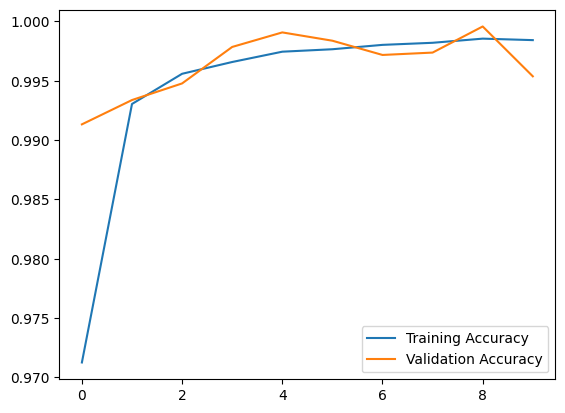

In [9]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


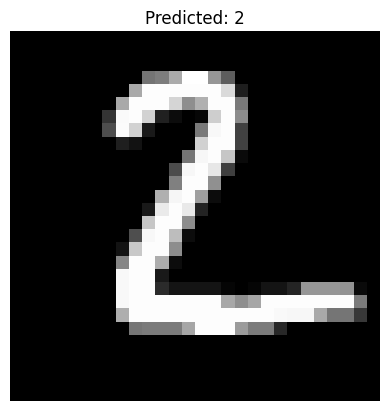

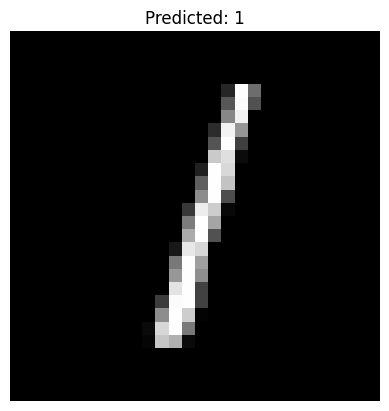

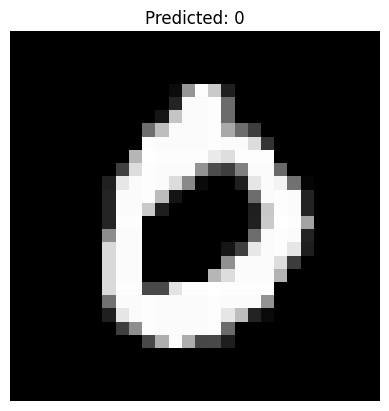

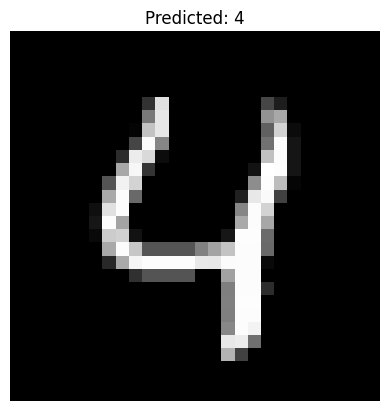

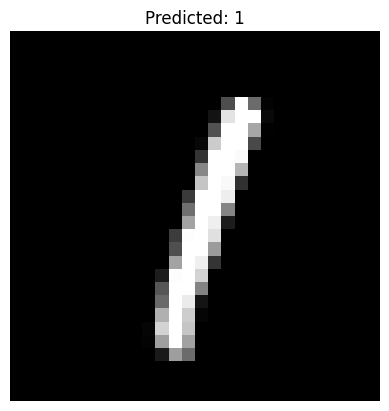

In [10]:
import pandas as pd
test_data = pd.read_csv('../content/sample_data/mnist_test.csv')
X_test = test_data.iloc[:, 1:].values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()